In [ ]:
#| include: false
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML
import pandas as pd

from glycowork import GlycoDraw as OrigGlycoDraw
import re
def GlycoDraw(*args, **kwargs):
  result = OrigGlycoDraw(*args, **kwargs)
  if hasattr(result, 'as_svg'):
    svg = result.as_svg()
    result._repr_svg_ = lambda: re.sub(r'(<svg[^>]*>)', r'\1<style>svg{background:white}</style>', svg)
  return result
import glycowork
glycowork.GlycoDraw = GlycoDraw

![CI](https://github.com/BojarLab/glycowork/actions/workflows/test.yaml/badge.svg) ![PyPI - Downloads](https://img.shields.io/pypi/dm/glycowork?color=brightgreen)[![contributions welcome](https://img.shields.io/badge/contributions-welcome-brightgreen.svg?style=flat)](https://github.com/BojarLab/glycowork/issues)[![DOI](https://zenodo.org/badge/327716604.svg)](https://zenodo.org/doi/10.5281/zenodo.10039202)[![codecov](https://codecov.io/gh/BojarLab/glycowork/graph/badge.svg?token=3AHNZ9QRZV)](https://codecov.io/gh/BojarLab/glycowork)


<img src="./glycowork_badge_wo_bg.jpg" width="200" alt="glycowork logo" />

Glycans are fundamental biological sequences that are as crucial as DNA, RNA, and proteins. As complex carbohydrates forming branched structures, glycans are ubiquitous yet often overlooked in biological research.

## Why Glycans are Important
- Ubiquitous in biology
- Integral to protein and lipid function
- Relevant to human diseases

## Challenges in Glycan Analysis
Analyzing glycans is complicated due to their non-linear structures and enormous diversity. But that's where `glycowork` comes in.

## Introducing glycowork: Your Solution for Glycan-Focused Data Science
Glycowork is a Python package specifically designed to simplify glycan sequence processing and analysis. It offers:

- Functions for glycan analysis
- Datasets for model training
- Full support for IUPAC-condensed string representation. Broad support for IUPAC-extended, LinearCode, Oxford, GlycoCT, WURCS, GLYCAM, CSDB-linear, GlycoWorkBench, GlyTouCan IDs, and more.
- Powerful graph-based architecture for in-depth analysis

**Documentation:** <https://bojarlab.github.io/glycowork/>

**Contribute:** Interested in contributing? Read our [Contribution Guidelines](https://github.com/BojarLab/glycowork/blob/master/CONTRIBUTING.md)

**Citation:** If `glycowork` adds value to your project, please cite [Thomes et al., 2021](https://academic.oup.com/glycob/advance-article/doi/10.1093/glycob/cwab067/6311240)

## Install

<u>Not familiar with Python?</u> Try our no-code, graphical user interface (`glycoworkGUI.exe`, can be downloaded at the bottom of the latest [Release](https://github.com/BojarLab/glycowork/releases) page) for accessing some of the most useful `glycowork` functions

Or try our [web interface](https://canonicalize.streamlit.app/) for sequence format conversion/cleaning and drawing glycan SNFG structures!

<u>via pip:</u> <br>
`pip install glycowork` <br>
`import glycowork`

<u>alternative:</u> <br>
`pip install git+https://github.com/BojarLab/glycowork.git` <br>
`import glycowork`

<u>Note that we have optional extra installs for specialized use (even further instructions can be found in the `Examples` tab; on Mac you might need to use `"glycowork[ml]"`), such as:</u> <br>
_deep learning_ <br>
`pip install glycowork[ml]` <br>
_analyzing atomic/chemical properties of glycans_ <br>
`pip install glycowork[chem]` <br>
_everything_ <br>
`pip install glycowork[all]` <br>

## Data & Models

`Glycowork` currently contains the following main datasets that are freely available to everyone:

- **`df_glycan`**
    - contains ~50,500 unique glycan sequences, including labels such as ~39,500 species associations, ~20,000 tissue associations, and ~1,000 disease associations
- **`glycan_binding`**
    - contains >790,000 protein-glycan binding interactions, from >2,000 unique glycan-binding proteins
    
Additionally, we store these trained deep learning models for easy usage, which can be retrieved with the `prep_model` function:

- **`LectinOracle`**
    - can be used to predict glycan-binding specificity of a protein, given its ESMC representation; from [Lundstrom et al., 2021](https://onlinelibrary.wiley.com/doi/10.1002/advs.202103807)
- **`LectinOracle_flex`**
    - operates the same as LectinOracle but can directly use the raw protein sequence as input (no ESMC representation required)
- **`SweetNet`**
    - a graph convolutional neural network trained to predict species from glycan, can be used to generate learned glycan representations; from [Burkholz et al., 2021](https://pubmed.ncbi.nlm.nih.gov/34133929/)
- **`NSequonPred`**
    - given the ESM-1b representation of an N-sequon (+/- 20 AA), this model can predict whether the sequon will be glycosylated

## How to use

`Glycowork` currently contains four main modules:

 - **`glycan_data`**
     - stores several glycan datasets and contains helper functions
 - **`ml`**
     - here are all the functions for training and using machine learning models, including train-test-split, getting glycan representations, etc.
 - **`motif`**
     - contains functions for processing & drawing glycan sequences, identifying motifs and features, and analyzing them
 - **`network`**
     - contains functions for constructing and analyzing glycan networks (e.g., biosynthetic networks)
     
Below are some examples of what you can do with `glycowork`; be sure to check out the other `examples` in the full documentation for everything that's there.  [--> Learn more](./05_examples.ipynb)
A non-exhaustive list includes:

- using trained AI models for prediction [--> Learn more](./02_ml.ipynb#inference)
- training your own AI models [--> Learn more](./02_ml.ipynb#model_training)
- motif enrichment analyses [--> Learn more](./03_motif.ipynb#analysis)
- differential glycomics expression analysis [--> Learn more](./03_motif.ipynb#analysis)
- annotating motifs in glycans [--> Learn more](./03_motif.ipynb#annotate)
- drawing publication-quality glycan figures [--> Learn more](./03_motif.ipynb#draw)
- finding out whether & where glycans are describing the same sequence [--> Learn more](./03_motif.ipynb#graph)
- _m/z_ to composition to structure to motif mappings [--> Learn more](./03_motif.ipynb#tokenization)
- mass calculation [--> Learn more](./03_motif.ipynb#tokenization)
- visualizing motif distribution / glycan similarities / sequence properties [--> Learn more](./03_motif.ipynb#analysis)
- constructing and analyzing biosynthetic networks [--> Learn more](./04_network.ipynb#biosynthesis)

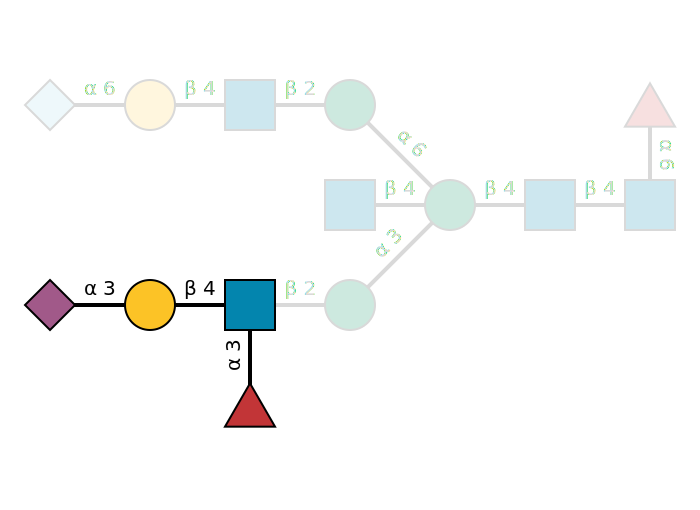

In [ ]:
#drawing publication-quality glycan figures
from glycowork import GlycoDraw
GlycoDraw("Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc", highlight_motif = "Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc")

In [ ]:
#get motifs, graph features, and sequence features of a set of glycan sequences to train models or analyze glycan properties
glycans = ["Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc",
           "Ma3(Ma6)Mb4GNb4GN;N",
           "α-D-Manp-(1→3)[α-D-Manp-(1→6)]-β-D-Manp-(1→4)-β-D-GlcpNAc-(1→4)-β-D-GlcpNAc-(1→",
           "F(3)XA2",
           "WURCS=2.0/5,11,10/[a2122h-1b_1-5_2*NCC/3=O][a1122h-1b_1-5][a1122h-1a_1-5][a2112h-1b_1-5][a1221m-1a_1-5]/1-1-2-3-1-4-3-1-4-5-5/a4-b1_a6-k1_b4-c1_c3-d1_c6-g1_d2-e1_e4-f1_g2-h1_h4-i1_i2-j1",
           """RES
1b:b-dglc-HEX-1:5
2s:n-acetyl
3b:b-dglc-HEX-1:5
4s:n-acetyl
5b:b-dman-HEX-1:5
6b:a-dman-HEX-1:5
7b:b-dglc-HEX-1:5
8s:n-acetyl
9b:b-dgal-HEX-1:5
10s:sulfate
11s:n-acetyl
12b:a-dman-HEX-1:5
13b:b-dglc-HEX-1:5
14s:n-acetyl
15b:b-dgal-HEX-1:5
16s:n-acetyl
LIN
1:1d(2+1)2n
2:1o(4+1)3d
3:3d(2+1)4n
4:3o(4+1)5d
5:5o(3+1)6d
6:6o(2+1)7d
7:7d(2+1)8n
8:7o(4+1)9d
9:9o(-1+1)10n
10:9d(2+1)11n
11:5o(6+1)12d
12:12o(2+1)13d
13:13d(2+1)14n
14:13o(4+1)15d
15:15d(2+1)16n"""]
from glycowork.motif.annotate import annotate_dataset
out = annotate_dataset(glycans, feature_set = ['known', 'terminal', 'exhaustive'], condense=True)

In [ ]:
#| echo: false
HTML(out.to_html())

,Internal_LewisX,Internal_LewisA,H_antigen_type2,Chitobiose,Trimannosylcore,Terminal_LacNAc_type1,Internal_LacNAc_type2,Terminal_LacNAc_type2,Terminal_LacdiNAc_type2,core_fucose,core_fucose(a1-3),Fuc,Gal,GalNAc,GalNAcOS,GlcNAc,Man,Neu5Ac,Xyl,Fuc(a1-2)Gal,Fuc(a1-3)GlcNAc,Fuc(a1-4)GlcNAc,Fuc(a1-6)GlcNAc,Fuc(a1-?)GlcNAc,Gal(b1-3)GlcNAc,Gal(b1-4)GlcNAc,Gal(b1-?)GlcNAc,GalNAc(b1-4)GlcNAc,GalNAcOS(b1-4)GlcNAc,GlcNAc(b1-2)Man,GlcNAc(b1-4)GlcNAc,Man(a1-3)Man,Man(a1-6)Man,Man(a1-?)Man,Man(b1-4)GlcNAc,Neu5Ac(a2-3)Gal,Xyl(b1-2)Man,Terminal_GalNAcOS(b1-4),Terminal_Fuc(a1-3),Terminal_Gal(b1-4),Terminal_Fuc(a1-4),Terminal_Fuc(a1-6),Terminal_Gal(b1-3),Terminal_Neu5Ac(a2-3),Terminal_GlcNAc(b1-2),Terminal_Fuc(a1-2),Terminal_Man(a1-6),Terminal_Xyl(b1-2),Terminal_Man(a1-3),Terminal_GalNAc(b1-4),Terminal_Fuc(a1-?),Terminal_Gal(b1-?),Terminal_Man(a1-?)
Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc,1,1,0,1,1,1,1,0,0,1,0,3,2,0,0,4,3,1,0,0,1,1,1,3,1,1,2,0,0,2,1,1,1,2,1,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,3,1,0
Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2
Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2
GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,4,3,0,1,0,1,0,0,1,0,0,0,0,0,2,1,1,1,2,1,0,1,0,1,0,0,0,0,0,2,0,0,1,0,0,1,0,0
Fuc(a1-2)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)[Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc,0,0,1,1,1,0,1,1,0,1,0,2,2,0,0,4,3,0,0,1,0,0,1,1,0,2,2,0,0,2,1,1,1,2,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,2,1,0
GalNAcOS(b1-4)GlcNAc(b1-2)Man(a1-3)[GalNAc(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,4,3,0,0,0,0,0,0,0,0,0,0,1,1,2,1,1,1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
#using graphs, you can easily check whether a glycan contains a specific motif; how about internal Lewis A/X motifs?
from glycowork.motif.graph import subgraph_isomorphism
print(subgraph_isomorphism('Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
                     'Fuc(a1-?)[Gal(b1-?)]GlcNAc', termini_list = ['terminal', 'internal', 'flexible']))
print(subgraph_isomorphism('Neu5Ac(a2-3)Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
                     'Fuc(a1-3/4)[Gal(b1-3/4)]GlcNAc', termini_list = ['t', 'i', 'f']))
print(subgraph_isomorphism('Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
                     'dHex(a1-?)[Hex(b1-?)]GlcNAc', termini_list = ['t', 'i', 'f']))

#or you could find the terminal epitopes of a glycan
from glycowork.motif.annotate import get_terminal_structures
print("\nTerminal structures:")
print(get_terminal_structures('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'))

True
True
False

Terminal structures:
['Man(a1-3)', 'Man(a1-6)', 'Fuc(a1-6)']


In [ ]:
#given a composition, find matching glycan structures in SugarBase; specific for glycan classes and taxonomy
from glycowork.motif.tokenization import compositions_to_structures
print(compositions_to_structures([{'Hex':3, 'HexNAc':4}], glycan_class = 'N'))

#or we could calculate the mass of this composition
from glycowork.motif.tokenization import composition_to_mass
print("\nMass of the composition Hex3HexNAc4")
print(composition_to_mass({'Hex':3, 'HexNAc':4}))
print(composition_to_mass("H3N4"))
print(composition_to_mass("Hex3HexNAc4"))

0 compositions could not be matched. Run with verbose = True to see which compositions.
                                               glycan  abundance
0   GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Ma...          0
1   GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-4)][Man(a1-6)]...          0
2   GlcNAc(b1-2)[GlcNAc(b1-4)]Man(a1-3)[Man(a1-6)]...          0
3   GalNAc(b1-4)GlcNAc(b1-2)Man(a1-3)[Man(a1-6)]Ma...          0
4   GalNAc(b1-3/4)GlcNAc(b1-2)Man(a1-3)[Man(a1-6)]...          0
5   GlcNAc(b1-2)Man(a1-6)[Man(a1-3)][GlcNAc(b1-4)]...          0
6   GlcNAc(b1-2)Man(a1-3/6)[GlcNAc(b1-4)][Man(a1-3...          0
7   Man(a1-3)[GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]...          0
8   GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-6)Man(a1-6)]Ma...          0
9   GlcNAc(b1-4)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Ma...          0
10  GlcNAc(b1-4)Man(a1-3)[GlcNAc(b1-4)Man(a1-6)]Ma...          0
11  GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)[GlcNAc(b1-4...          0
12  GlcNAc(b1-4)Man(a1-3)[GlcNAc(b1-6)Man(a1-6)]Ma...          0
13

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()